# importing required libraries

In [212]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

  Using cached pip-25.1.1-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-25.1.1-py3-none-any.whl (1.8 MB)


#### Loading data

In [159]:
df=pd.read_csv("diabetes.csv")

In [160]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [162]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [163]:
df.isnull().sum().reset_index(False)

,index,0
0,Pregnancies,0
1,Glucose,0
2,BloodPressure,0
3,SkinThickness,0
4,Insulin,0
5,BMI,0
6,DiabetesPedigreeFunction,0
7,Age,0
8,Outcome,0


In [164]:
df.shape

(768, 9)

### What is the distribution of the target variable (Outcome)? Is the dataset balanced?

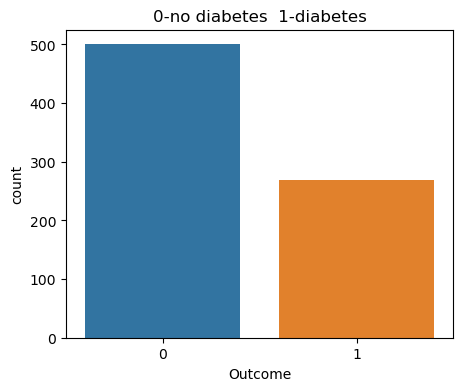

In [165]:
plt.figure(figsize=(5,4))
sns.countplot(x=df["Outcome"])
plt.title("0-no diabetes  1-diabetes")
plt.show()

In [166]:
df["Outcome"].value_counts().reset_index(False)

,Outcome,count
0,0,500
1,1,268


#### The dataset is inbalanced

### Plot the distribution of each feature (e.g., Glucose, BMI, Age).

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

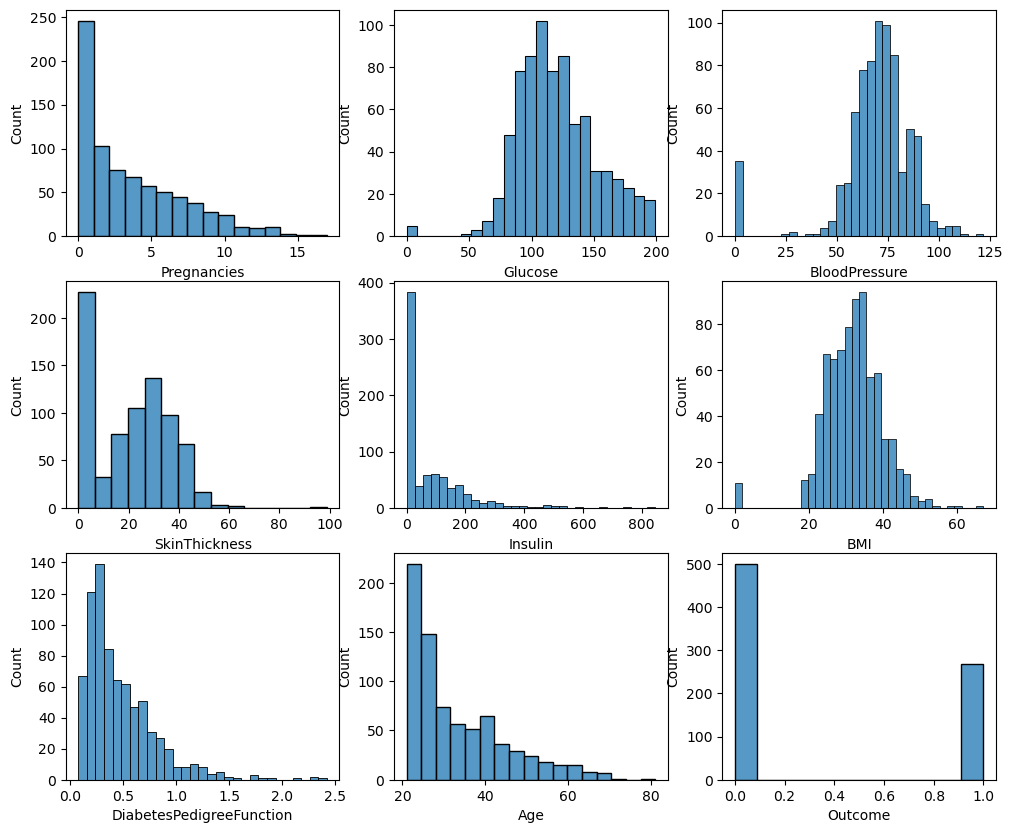

In [167]:
plt.figure(figsize=(12,10))
for i,col in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.histplot(x=df[col])
plt.show()

### Check the correlation between numeric variables. Which features are most correlated with Outcome?

In [168]:
co=df.corr()
co

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

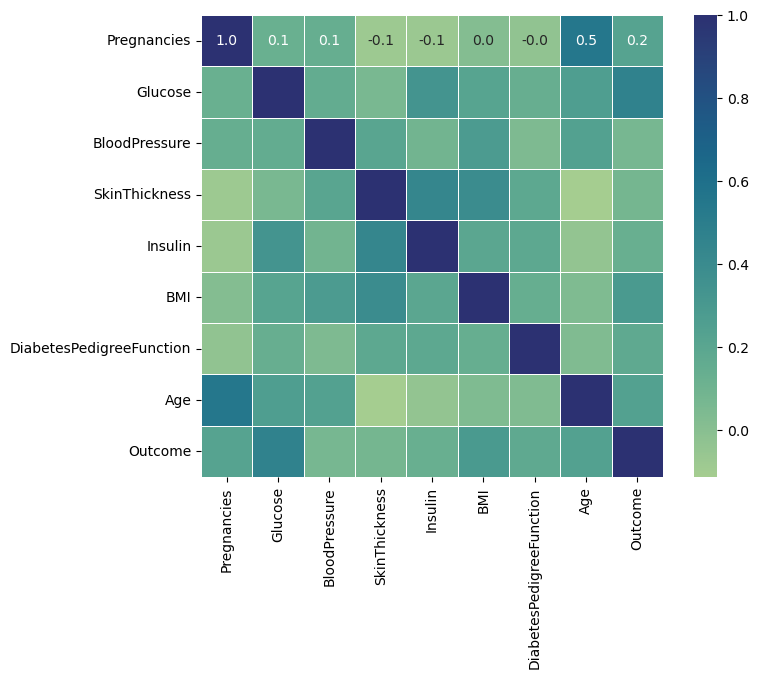

In [169]:
plt.figure(figsize=(8,6))
sns.heatmap(co,annot=True,cmap="crest",square=True,fmt=".1f",linewidths=0.5)

### What are the mean, median, and standard deviation of BMI, Glucose, and Age?

In [170]:
df[['BMI','Glucose',"Age"]].describe()

,BMI,Glucose,Age
count,768.000000,768.000000,768.000000
mean,31.992578,120.894531,33.240885
std,7.884160,31.972618,11.760232
min,0.000000,0.000000,21.000000
25%,27.300000,99.000000,24.000000
50%,32.000000,117.000000,29.000000
75%,36.600000,140.250000,41.000000
max,67.100000,199.000000,81.000000


### Compare the average Glucose level between diabetic and non-diabetic patients.

In [171]:
avg=df.groupby('Outcome')["Glucose"].mean().reset_index(False)
avg

,Outcome,Glucose
0,0,109.980000
1,1,141.257463


### Use a boxplot to compare BMI for patients with and without diabetes.

In [172]:
without_diabetes=df[df["Outcome"]==0]
with_diabetes=df[df["Outcome"]==1]

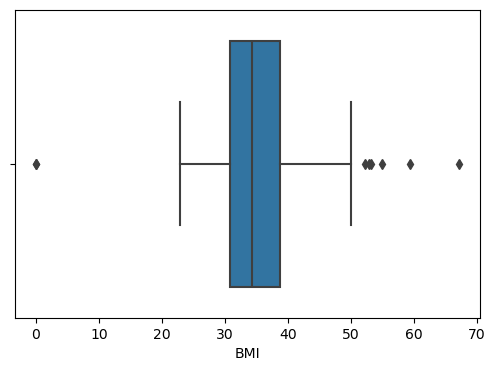

In [173]:
plt.figure(figsize=(6,4))
sns.boxplot(x=with_diabetes["BMI"])
plt.show()

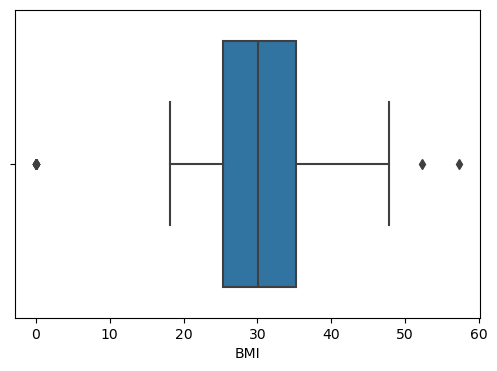

In [174]:
plt.figure(figsize=(6,4))
sns.boxplot(x=without_diabetes["BMI"])
plt.show()

In [175]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

#### the data set is imbalanced so we are take 200 each outcome

In [176]:
zero=df[df["Outcome"]==0]
one=df[df["Outcome"]==1]

In [177]:
zero=zero.sample(n=200)
one=one.sample(n=200)

In [178]:
df=pd.concat([zero,one]).sample(frac=1).reset_index(drop=True)

In [179]:
df["Outcome"].value_counts()

Outcome
1    200
0    200
Name: count, dtype: int64

### Splitting the feature and target column

In [180]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

## splitting the data into training data and testing data

In [181]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [182]:
print(x_train.shape,y_train.shape)

(320, 8) (320,)


## Models

In [183]:
models={"logistic":LogisticRegression(),
       "Random forest": RandomForestClassifier(),
       "Desition tree": DecisionTreeClassifier(),
       "SVM":SVC(),
       "Gradient": GradientBoostingClassifier()}

### fit the training data into model

In [184]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_train)
    print(f"Accuracy score on train data: {name} ",accuracy_score(y_pred,y_train))
    x_pred=model.predict(x_test)
    print(f"Accuracy score on test data: {name} ",accuracy_score(x_pred,y_test))
    print("-"*30)

Accuracy score on train data: logistic  0.728125
Accuracy score on test data: logistic  0.7
------------------------------


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score on train data: Random forest  1.0
Accuracy score on test data: Random forest  0.7
------------------------------
Accuracy score on train data: Desition tree  1.0
Accuracy score on test data: Desition tree  0.5625
------------------------------
Accuracy score on train data: SVM  0.725
Accuracy score on test data: SVM  0.7
------------------------------
Accuracy score on train data: Gradient  0.971875
Accuracy score on test data: Gradient  0.675
------------------------------


In [208]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_train)
    print(f"Accuracy score on train data: {name} ",f1_score(y_pred,y_train))
    x_pred=model.predict(x_test)
    print(f"Accuracy score on test data: {name} ",f1_score(x_pred,y_test))
    print("-"*30)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score on train data: logistic  0.7289719626168223
Accuracy score on test data: logistic  0.6842105263157895
------------------------------
Accuracy score on train data: Random forest  1.0
Accuracy score on test data: Random forest  0.7560975609756098
------------------------------
Accuracy score on train data: Desition tree  1.0
Accuracy score on test data: Desition tree  0.5679012345679013
------------------------------
Accuracy score on train data: SVM  0.721518987341772
Accuracy score on test data: SVM  0.7073170731707318
------------------------------
Accuracy score on train data: Gradient  0.9723076923076923
Accuracy score on test data: Gradient  0.691358024691358
------------------------------


In [209]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_train)
    print(f"Accuracy score on train data: {name} ",recall_score(y_pred,y_train))
    x_pred=model.predict(x_test)
    print(f"Accuracy score on test data: {name} ",recall_score(x_pred,y_test))
    print("-"*30)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score on train data: logistic  0.73125
Accuracy score on test data: logistic  0.7027027027027027
------------------------------
Accuracy score on train data: Random forest  1.0
Accuracy score on test data: Random forest  0.6744186046511628
------------------------------
Accuracy score on train data: Desition tree  1.0
Accuracy score on test data: Desition tree  0.5121951219512195
------------------------------
Accuracy score on train data: SVM  0.7354838709677419
Accuracy score on test data: SVM  0.6744186046511628
------------------------------
Accuracy score on train data: Gradient  0.9634146341463414
Accuracy score on test data: Gradient  0.6666666666666666
------------------------------


In [210]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_train)
    print(f"Accuracy score on train data: {name} ",precision_score(y_pred,y_train))
    x_pred=model.predict(x_test)
    print(f"Accuracy score on test data: {name} ",precision_score(x_pred,y_test))
    print("-"*30)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score on train data: logistic  0.7267080745341615
Accuracy score on test data: logistic  0.6666666666666666
------------------------------
Accuracy score on train data: Random forest  1.0
Accuracy score on test data: Random forest  0.7692307692307693
------------------------------
Accuracy score on train data: Desition tree  1.0
Accuracy score on test data: Desition tree  0.5897435897435898
------------------------------
Accuracy score on train data: SVM  0.7080745341614907
Accuracy score on test data: SVM  0.7435897435897436
------------------------------
Accuracy score on train data: Gradient  0.9813664596273292
Accuracy score on test data: Gradient  0.717948717948718
------------------------------


## Lets build a LogisticRegression

In [186]:
model=LogisticRegression()

In [187]:
model.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [188]:
import pickle

In [192]:
pickle.dump(model,open("diabetes_model.pkl","wb"))

In [193]:
model=pickle.load(open("diabetes_model.pkl","rb"))

## lets predict 

In [205]:
input_data=[[6,148,72,35,0,33.6,0.627,50]] #-------------- outcome-1
input_data1=[[1,85,66,29,0,26.6,0.351,31]] #--------------outcome-0

In [206]:
prediction=model.predict(input_data1)[0]
print(prediction)
if prediction==0:
    print("The person no diabetes")
else:
    print("The person having diabetes")

0
The person no diabetes


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [211]:
!pip install h3==3.7.6
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
  Using cached h3-3.7.6-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
Using cached h3-3.7.6-cp311-cp311-win_amd64.whl (844 kB)
Defaulting to user installation because normal site-packages is not writeable


ERROR: To modify pip, please run the following command:
C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip
